<a href="https://colab.research.google.com/github/YagenGorrendel/MashineLearning7sem/blob/main/MashineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Датасет представляет собой данные о зараженных коронавирусом, их смертности и состоянии стран. Сведения собирались с февраля 2020 года по октябрь 2022. Имеется следующий набор данных:

iso code - Код страны

continent - Континент

location - Страна

date - Дата предоставления информации

total cases - Всего случаев заражения коронавирусом на данный день

new cases - Новые случаи за прошедшие сутки заражения коронавирусом

new cases smoothed - Обработанное количество случаев заражения коронавирусом за прошедшие сутки

total deaths - Всего смертей от коронавируса на данный день

new deaths - Новые смерти за прошедшие сутки

new deaths smoothed - Обработанное количество новых смертей за прошедшие сутки

total cases per million - Всего случаев заражения коронавирусом на данный день на миллион населения страны

new cases per million - Новые случаи за прошедшие сутки заражения коронавирусом на миллион населения страны

new cases smoothed per million - Обработанное количество случаев заражения коронавирусом за прошедшие сутки на миллион населения страны

total deaths per million - Всего смертей от коронавируса на данный день на миллион населения страны

new deaths per million - Новые смерти за прошедшие сутки на миллион населения страны

new deaths smoothed per million - Обработанное количество новых смертей за прошедшие сутки на миллион населения страны

reproduction rate - Коэффициент рождаемости

icu patients - Пациентов в реанимации

icu patients per million - Пациентов в реанимации на миллион населения страны

hosp patients - Госпитализировано пациентов

hosp patients per million - Госпитализировано пациентов на миллион населения страны

weekly icu admissions - Новых пациентов в реанимации за неделю

weekly icu admissions per million - Новых пациентов в реанимации за неделю на миллион населения страны

weekly hosp admissions - Госпитализировано за неделю

weekly hosp admissions per million - Госпитализировано за неделю на миллион населения страны

total tests - Всего тестов

new tests - Новые тесты за прошедшие сутки

total tests per thousand - Всего тестов на тысячу населения страны

new tests per thousand - Новые тесты за прошедшие сутки на тысячу населения страны

new tests smoothed - Обработанное количество тестов за прошедшие сутки

new tests smoothed per thousand - Обработанное количество тестов за прошедшие сутки на тысячу населения страны

positive rate - Положительный показатель

tests per case - Количество тестов на случай заражения

tests units - Единиц тестов

total vaccinations - Всего вакцинаций проведено

people vaccinated - Людей вакцинировано

people fully vaccinated - Людей, полностью вакцинированных

total boosters - Всего ревакцинаций

new vaccinations - Новых вакцинаций за прошедшие сутки

new vaccinations smoothed - Обработанное количество новых вакцинаций за прошедшие сутки

total vaccinations per hundred - Всего вакцинаций на сотню населения проведено

people vaccinated per hundred - Людей вакцинировано на сотню населения страны

people fully vaccinated per hundred - Людей, полностью вакцинированных, на сотню населения страны

total boosters per hundred - Всего ревакцинаций на сотню населения страны

new vaccinations smoothed per million - Обработанное количество новых вакцинаций на миллион населения страны

new people vaccinated smoothed - Обработанное количество вакцинированных за прошедшие сутки

new people vaccinated smoothed per hundred - Обработанное количество вакцинированных за прошедшие сутки на сотню населения страны

stringency index - Индекс строгости

population - Население

population density - Плотность населения

median age - Средний возраст населения

aged 65 older - Население, старше 65 лет

aged 70 older - Население, старше 70 лет

gdp per capita - ВВП на душу населения

extreme poverty - Случаев крайней бедности

cardiovasc death rate - Смертность от сердечно-сосудистых заболеваний

diabetes prevalence - Распространенность диабета

female smokers - Количество курящих женщин

male smokers - Количество курящих мужчин

handwashing facilities - Количество приспособлений для мытья рук

hospital beds per thousand - Количество коек в госпитале на тысячу населения страны

life expectancy - Ожидаемая продолжительность жизни

human development index - Индекс человеческого развития

excess mortality cumulative absolute - Совокупная избыточная абсолютная смертность 

excess mortality cumulative - Совокупная избыточная смертность

excess mortality - Избыточная смертность

excess mortality cumulative per million - Совокупная избыточная смертность на миллион населения страны

По данному набору данных необходимо предсказать количество новых заражений и новых смертей на следующие сутки.

Прочитаем данные из датасета:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline 

In [2]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
data = pd.read_csv(url)

In [3]:
m, n = data.shape
m, n

(251819, 67)

In [4]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251819 entries, 0 to 251818
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    251819 non-null  object 
 1   continent                                   237677 non-null  object 
 2   location                                    251819 non-null  object 
 3   date                                        251819 non-null  object 
 4   total_cases                                 237480 non-null  float64
 5   new_cases                                   237187 non-null  float64
 6   new_cases_smoothed                          235983 non-null  float64
 7   total_deaths                                217923 non-null  float64
 8   new_deaths                                  217822 non-null  float64
 9   new_deaths_smoothed                         216636 non-null  float64
 

В исходном датасете очень большое количество пропущенных значений, поэтому удалим все столбцы и строки, которые заполнены меньше чем наполовину:

In [6]:
new_data = data.dropna(axis=1, thresh=m//2).dropna(axis=0)
new_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
2458,ALB,Europe,Albania,2021-01-11,63971.0,376.0,621.143,1247.0,6.0,6.857,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2459,ALB,Europe,Albania,2021-01-12,64627.0,656.0,620.571,1252.0,5.0,6.000,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2460,ALB,Europe,Albania,2021-01-13,65334.0,707.0,618.000,1256.0,4.0,5.571,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2461,ALB,Europe,Albania,2021-01-14,65994.0,660.0,612.714,1261.0,5.0,5.429,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2462,ALB,Europe,Albania,2021-01-15,66635.0,641.0,608.143,1265.0,4.0,5.000,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251710,ZWE,Africa,Zimbabwe,2022-10-05,257568.0,0.0,22.714,5603.0,0.0,0.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.70,61.49,0.571,16320539.0
251711,ZWE,Africa,Zimbabwe,2022-10-06,257655.0,87.0,35.143,5604.0,1.0,0.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.70,61.49,0.571,16320539.0
251712,ZWE,Africa,Zimbabwe,2022-10-07,257655.0,0.0,27.143,5604.0,0.0,0.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.70,61.49,0.571,16320539.0
251713,ZWE,Africa,Zimbabwe,2022-10-08,257655.0,0.0,27.143,5604.0,0.0,0.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.70,61.49,0.571,16320539.0


In [7]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57329 entries, 2458 to 251714
Data columns (total 36 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    57329 non-null  object 
 1   continent                                   57329 non-null  object 
 2   location                                    57329 non-null  object 
 3   date                                        57329 non-null  object 
 4   total_cases                                 57329 non-null  float64
 5   new_cases                                   57329 non-null  float64
 6   new_cases_smoothed                          57329 non-null  float64
 7   total_deaths                                57329 non-null  float64
 8   new_deaths                                  57329 non-null  float64
 9   new_deaths_smoothed                         57329 non-null  float64
 10  total_

Также можно заметить, что для исследования данных нам потребуются только код страны и дата получения данных. Поэтому удалим столбцы с данными о континенте и названием страны:

In [8]:
data_work = new_data.drop(["continent", "location"], axis=1)

Отобразим матрицу корреляции в цвете, чтобы было нагляднее:

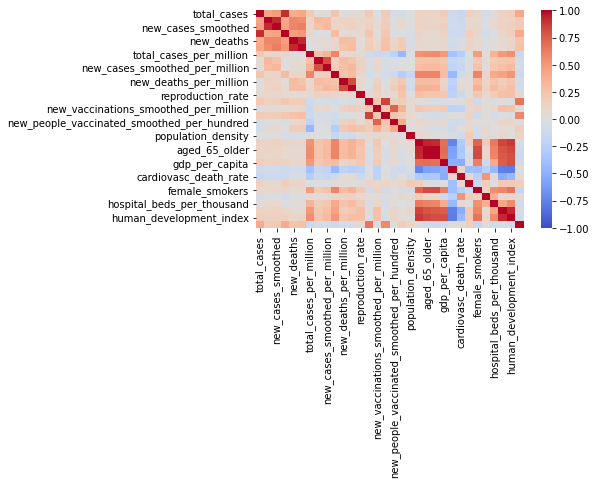

In [9]:
import seaborn as sns

sns.heatmap(data_work.corr(), cmap='coolwarm', vmin=-1, vmax=1)

Отсортируем по коду страны и дате, чтобы было проще выделить обучающую и тестовую выборки:

In [10]:
data_work = data_work.sort_values(by=["iso_code", "date"])
data_work

,iso_code,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
2458,ALB,2021-01-11,63971.0,376.0,621.143,1247.0,6.0,6.857,22506.630,132.286,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2459,ALB,2021-01-12,64627.0,656.0,620.571,1252.0,5.0,6.000,22737.428,230.798,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2460,ALB,2021-01-13,65334.0,707.0,618.000,1256.0,4.0,5.571,22986.168,248.741,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2461,ALB,2021-01-14,65994.0,660.0,612.714,1261.0,5.0,5.429,23218.373,232.205,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2462,ALB,2021-01-15,66635.0,641.0,608.143,1265.0,4.0,5.000,23443.893,225.520,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251710,ZWE,2022-10-05,257568.0,0.0,22.714,5603.0,0.0,0.143,15781.832,0.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.70,61.49,0.571,16320539.0
251711,ZWE,2022-10-06,257655.0,87.0,35.143,5604.0,1.0,0.286,15787.162,5.331,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.70,61.49,0.571,16320539.0
251712,ZWE,2022-10-07,257655.0,0.0,27.143,5604.0,0.0,0.286,15787.162,0.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.70,61.49,0.571,16320539.0
251713,ZWE,2022-10-08,257655.0,0.0,27.143,5604.0,0.0,0.286,15787.162,0.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.70,61.49,0.571,16320539.0


In [11]:
data_work.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
count,5.732900e+04,5.732900e+04,57329.000000,5.732900e+04,57329.000000,57329.000000,57329.000000,57329.000000,57329.000000,57329.000000,...,57329.000000,57329.000000,57329.000000,57329.000000,57329.000000,57329.000000,57329.000000,57329.000000,57329.000000,5.732900e+04
mean,3.363488e+06,6.999292e+03,7012.376748,5.086809e+04,67.114968,67.423802,96446.017032,242.763409,242.962302,1121.630900,...,19772.655190,9.416053,245.781005,7.017540,10.761407,32.267700,2.973424,74.306264,0.752578,7.230464e+07
std,9.358159e+06,2.931244e+04,27353.534605,1.304858e+05,261.231072,245.311257,123659.561235,736.446083,597.411521,1130.178764,...,17935.746525,16.453873,112.922063,3.426997,10.011811,14.358835,2.260516,6.666464,0.147238,2.133848e+08
min,1.090000e+02,0.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,15.527000,0.000000,0.000000,0.266000,...,752.788000,0.100000,85.998000,0.990000,0.100000,7.700000,0.300000,60.850000,0.394000,1.071350e+05
25%,1.371690e+05,5.000000e+00,68.857000,1.995000e+03,0.000000,0.429000,8539.756000,0.183000,4.311000,129.868000,...,5591.597000,0.500000,140.448000,4.820000,1.900000,20.600000,1.300000,69.660000,0.632000,5.302690e+06
50%,5.697020e+05,3.970000e+02,633.714000,8.178000e+03,3.000000,5.571000,51511.730000,25.026000,53.006000,764.561000,...,14600.861000,1.300000,235.848000,6.730000,6.900000,30.400000,2.320000,75.930000,0.780000,1.800100e+07
75%,2.284337e+06,2.949000e+03,3417.571000,3.030300e+04,31.000000,34.143000,119921.624000,185.202000,221.493000,1835.061000,...,27936.896000,10.100000,307.846000,8.380000,19.300000,41.100000,4.210000,78.860000,0.866000,5.187403e+07
max,1.007808e+08,1.354461e+06,806761.857000,1.093008e+06,4529.000000,4190.000000,628890.141000,35400.095000,10784.754000,5612.246000,...,94277.965000,71.400000,539.849000,22.020000,35.300000,78.100000,12.270000,83.560000,0.957000,1.425887e+09


Нормализуем данные рабочего датасета:

In [12]:
numerics = data_work.select_dtypes(include='float64')
data_std = (numerics - numerics.mean(axis = 0)) / numerics.std(axis = 0)
data_std.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
count,5.732900e+04,5.732900e+04,5.732900e+04,5.732900e+04,5.732900e+04,5.732900e+04,5.732900e+04,5.732900e+04,57329.000000,5.732900e+04,...,5.732900e+04,5.732900e+04,5.732900e+04,5.732900e+04,57329.000000,5.732900e+04,5.732900e+04,5.732900e+04,5.732900e+04,5.732900e+04
mean,7.932239e-18,7.932239e-18,5.552568e-17,7.932239e-18,-2.379672e-17,-2.379672e-17,6.345791e-17,3.966120e-18,0.000000,-1.427803e-16,...,-1.903737e-16,-1.031191e-16,3.172896e-17,-1.308819e-16,0.000000,1.665770e-16,-3.966120e-17,7.139015e-16,-2.379672e-17,4.164426e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.594061e-01,-2.387823e-01,-2.563609e-01,-3.898286e-01,-2.569180e-01,-2.748500e-01,-7.798062e-01,-3.296418e-01,-0.406692,-9.922014e-01,...,-1.060445e+00,-5.661921e-01,-1.414985e+00,-1.758840e+00,-1.064883,-1.710982e+00,-1.182661e+00,-2.018501e+00,-2.435365e+00,-3.383442e-01
25%,-3.447601e-01,-2.386118e-01,-2.538436e-01,-3.745473e-01,-2.569180e-01,-2.731012e-01,-7.108731e-01,-3.293933e-01,-0.399476,-8.775275e-01,...,-7.906589e-01,-5.418817e-01,-9.327938e-01,-6.412435e-01,-0.885095,-8.125799e-01,-7.402840e-01,-6.969608e-01,-8.189326e-01,-3.139959e-01
50%,-2.985402e-01,-2.252386e-01,-2.331934e-01,-3.271628e-01,-2.454339e-01,-2.521401e-01,-3.633709e-01,-2.956597e-01,-0.317966,-3.159411e-01,...,-2.883512e-01,-4.932609e-01,-8.796337e-02,-8.390425e-02,-0.385685,-1.300733e-01,-2.890595e-01,2.435679e-01,1.862439e-01,-2.544869e-01
75%,-1.153166e-01,-1.381766e-01,-1.314202e-01,-1.576041e-01,-1.382491e-01,-1.356677e-01,1.898406e-01,-7.816106e-02,-0.035937,6.312542e-01,...,4.551938e-01,4.156754e-02,5.496268e-01,3.975668e-01,0.852852,6.151126e-01,5.470328e-01,6.830812e-01,7.703329e-01,-9.574538e-02
max,1.040988e+01,4.596894e+01,2.923752e+01,7.986617e+00,1.708022e+01,1.680549e+01,4.305725e+00,4.773918e+01,17.645779,3.973367e+00,...,4.154012e+00,3.767134e+00,2.604168e+00,4.377728e+00,2.450964,3.191923e+00,4.112591e+00,1.388103e+00,1.388381e+00,6.343388e+00


In [13]:
numerics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57329 entries, 2458 to 251714
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   total_cases                                 57329 non-null  float64
 1   new_cases                                   57329 non-null  float64
 2   new_cases_smoothed                          57329 non-null  float64
 3   total_deaths                                57329 non-null  float64
 4   new_deaths                                  57329 non-null  float64
 5   new_deaths_smoothed                         57329 non-null  float64
 6   total_cases_per_million                     57329 non-null  float64
 7   new_cases_per_million                       57329 non-null  float64
 8   new_cases_smoothed_per_million              57329 non-null  float64
 9   total_deaths_per_million                    57329 non-null  float64
 10  new_de

In [14]:
data_work = pd.concat([data_work["iso_code"], data_work["date"], data_std], axis=1)

Для удобства переведем все даты в численный вид. Для этого выделим список уникальных стран и для каждой из них запишем даты в виде int, разницы в днях  от первого дня получения данных до дня записи:

In [15]:
cntry_list = data_work["iso_code"].unique()
cntry_list

array(['ALB', 'ARG', 'AUS', 'AUT', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR',
       'BIH', 'BRA', 'CAN', 'CHL', 'CHN', 'COL', 'CRI', 'DJI', 'DNK',
       'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FJI', 'GBR',
       'GEO', 'GHA', 'GMB', 'GRC', 'HRV', 'HTI', 'HUN', 'IDN', 'IND',
       'IRL', 'IRN', 'ISL', 'ISR', 'ITA', 'KAZ', 'KEN', 'KGZ', 'KOR',
       'LAO', 'LBR', 'LKA', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MEX',
       'MLT', 'MMR', 'MNG', 'MOZ', 'MUS', 'MWI', 'MYS', 'NER', 'NOR',
       'NPL', 'PAK', 'PAN', 'PRT', 'PRY', 'ROU', 'RUS', 'SLV', 'SVK',
       'SWE', 'SYC', 'TGO', 'THA', 'TLS', 'TUN', 'TUR', 'TZA', 'UGA',
       'UKR', 'URY', 'USA', 'VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype=object)

In [16]:
from datetime import date

glob_start_date = date(*map(int, data_work["date"].min().split("-")))
cntry_date = []

for c in cntry_list:
  cntry_date.append(data_work.loc[data_work["iso_code"]==c].drop(labels="iso_code", axis=1))
  for x in range(data_work["iso_code"].value_counts()[c]):
    cntry_date[-1].iat[x, 0] = (date(*map(int, cntry_date[-1].iat[x, 0].split("-"))) - glob_start_date).days

In [17]:
cntry_date

[     date  total_cases  new_cases  new_cases_smoothed  total_deaths  \
 2458   39    -0.352582  -0.225955           -0.233653     -0.380280   
 2459   40    -0.352512  -0.216403           -0.233674     -0.380241   
 2460   41    -0.352436  -0.214663           -0.233768     -0.380211   
 2461   42    -0.352366  -0.216266           -0.233961     -0.380172   
 2462   43    -0.352297  -0.216914           -0.234128     -0.380142   
 ...   ...          ...        ...                 ...           ...   
 3173  754    -0.323754  -0.238782           -0.256021     -0.362285   
 3174  755    -0.323751  -0.237929           -0.256006     -0.362285   
 3175  756    -0.323751  -0.238782           -0.256006     -0.362285   
 3176  757    -0.323748  -0.237759           -0.255969     -0.362285   
 3177  758    -0.323748  -0.238782           -0.256063     -0.362285   
 
       new_deaths  new_deaths_smoothed  total_cases_per_million  \
 2458   -0.233950            -0.246898                -0.597927   


In [18]:
y_lst = []

for c in range(len(cntry_date)):
  y_lst.append(cntry_date[c][["new_cases", "new_deaths"]].copy().iloc[1: , :])
  cntry_date[c] = cntry_date[c].drop(cntry_date[c].tail(1).index, axis=0).drop(["date", "new_cases", "new_deaths"], axis=1)

In [19]:
y_lst

[      new_cases  new_deaths
 2459  -0.216403   -0.237778
 2460  -0.214663   -0.241606
 2461  -0.216266   -0.237778
 2462  -0.216914   -0.241606
 2463  -0.218961   -0.237778
 ...         ...         ...
 3173  -0.238782   -0.256918
 3174  -0.237929   -0.256918
 3175  -0.238782   -0.256918
 3176  -0.237759   -0.256918
 3177  -0.238782   -0.256918
 
 [719 rows x 2 columns],       new_cases  new_deaths
 8795   0.156477    0.056980
 8796  -0.099592    0.026356
 8797  -0.060019   -0.042548
 8798  -0.038048    0.152681
 8799   0.041713    0.324942
 ...         ...         ...
 9521  -0.238782   -0.256918
 9522  -0.238782   -0.256918
 9523  -0.238782   -0.256918
 9524  -0.238782   -0.256918
 9525  -0.238782   -0.256918
 
 [731 rows x 2 columns],        new_cases  new_deaths
 13166  -0.238714   -0.256918
 13167  -0.238509   -0.256918
 13168  -0.238441   -0.256918
 13169  -0.238509   -0.256918
 13170  -0.238612   -0.256918
 ...          ...         ...
 13838  -0.166560   -0.256918
 13839  -0.1

Полученные данные запишем в X и y как вводные данные, и данные, которые будем предсказывать:

In [20]:
X = pd.concat(cntry_date).to_numpy()
y = pd.concat(y_lst).to_numpy()

Также выделим обучающую и тестовую выборки:

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

N_train, _ = X_train.shape
N_test, _ = X_test.shape
print(N_train, N_test)

42930 14310


Реализуем метод k соседей и найдем ошибку на обучающей и тестовой выборках:

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor()
knn = knn.fit(X_train, y_train)

print(mean_squared_error(y_train, knn.predict(X_train)))
print(mean_squared_error(y_test, knn.predict(X_test)))

0.10859746509106237
0.1682505087538893


Попробуем реализовать другие методы регрессии:

**RandomForest**

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X_train, y_train)

print(mean_squared_error(y_train, rf.predict(X_train)))
print(mean_squared_error(y_test, rf.predict(X_test)))

0.023866179517444384
0.14904293045120529


**ExtraTrees**

In [24]:
from sklearn.ensemble import ExtraTreesRegressor

ert = ExtraTreesRegressor().fit(X_train, y_train)

print(mean_squared_error(y_train, ert.predict(X_train)))
print(mean_squared_error(y_test, ert.predict(X_test)))

3.5279947114508794e-05
0.15537161699397728


**Выводы:**

В ходе данной работы были изучены основные методы обработки данных для использования их в алгоритмах машинного обучения, а именно:

1. метод визуализации данных,
2. метод обработки пропущенных значений,
3. метод обработки количественных признаков (нормализация),
4. метод обработки категориальных признаков (векторизация),
5. метод разбиения данных на обучабщую и тестовую выборки.

Также были изучены следующие методы машинного обучения:

1. метод k ближайших соседей,
2. методы случайных лесов.

Методы опорных векторов, адаптивного бустинга и градиентного бустинга не были исследованы, поскольку в поставленной задаче предсказываются 2 признака, что функциями не предусмотрено.

Из полученных результатов можно сделать следующие выводы:

1. лучшим методом на тестовой выборке стал метод RandomForest с процентом ошибки 14.6%.
2. методы случайных лесов показывают очень хорошие результаты на обучающей выборке (>2.3% ошибок), однако на тестовой выборке их результат сильно ухудшается, что свидетельствует о переобучении.

In [31]:
import warnings
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import ConfusionMatrixDisplay

warnings.simplefilter("ignore")

mlp = MLPRegressor(alpha=0.0001, hidden_layer_sizes=(50, 50), activation='logistic', solver='lbfgs', max_iter=1000, random_state=42).fit(X_train, y_train)

print(mean_squared_error(y_train, mlp.predict(X_train)))
print(mean_squared_error(y_test, mlp.predict(X_test)))

0.07850038769454906
0.23310358797434175


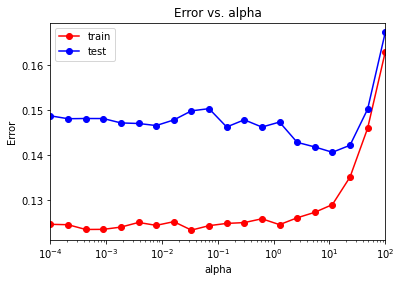

In [27]:
alpha_arr = np.logspace(-4, 2, 20)
train_err = []
test_err = []

for alpha in alpha_arr:
    mlp = MLPRegressor(alpha=alpha, hidden_layer_sizes=(50, 50), activation='logistic', solver='lbfgs', random_state=42).fit(X_train, y_train)
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_train_pred))
    test_err.append(mean_squared_error(y_test, y_test_pred))

plt.semilogx(alpha_arr, train_err, 'r-o', label='train')
plt.semilogx(alpha_arr, test_err, 'b-o', label='test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Error')
plt.legend()
pass

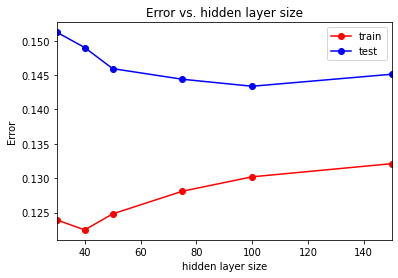

In [28]:
layer_arr = (30, 40, 50, 75, 100, 150)
train_err = []
test_err = []

for layer in layer_arr:
    mlp = MLPRegressor(alpha=0.001, hidden_layer_sizes=(layer, layer), activation='logistic', solver='lbfgs', random_state=42).fit(X_train, y_train)
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_train_pred))
    test_err.append(mean_squared_error(y_test, y_test_pred))

plt.plot(layer_arr, train_err, 'r-o', label='train')
plt.plot(layer_arr, test_err, 'b-o', label='test')
plt.xlim([np.min(layer_arr), np.max(layer_arr)])
plt.title('Error vs. hidden layer size')
plt.xlabel('hidden layer size')
plt.ylabel('Error')
plt.legend()
pass